In [2]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [3]:
# reading the CSV file from Zillow on rental data for metros
file20 = 'Metro_Zri_SingleFamilyResidenceRental.csv'
median_rental_metro = pd.read_csv(file20, encoding="ISO-8859-1")
#checking the columns
median_rental_metro.head()

,RegionID,RegionName,SizeRank,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,...,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05
0,102001,United States,0,1250.0,1248.0,1245.0,1240.0,1236.0,1234.0,1236.0,...,1415,1414,1417,1426,1438,1447,1450,1453,1456,1457
1,394913,"New York, NY",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2415,2415,2425,2438,2452,2457,2460,2461,2463,2456
2,753899,"Los Angeles-Long Beach-Anaheim, CA",2,2283.0,2272.0,2263.0,2259.0,2258.0,2263.0,2265.0,...,2892,2893,2897,2911,2930,2944,2950,2954,2959,2962
3,394463,"Chicago, IL",3,1581.0,1569.0,1560.0,1551.0,1541.0,1534.0,1530.0,...,1694,1693,1697,1713,1731,1747,1750,1752,1757,1762
4,394514,"Dallas-Fort Worth, TX",4,1297.0,1297.0,1297.0,1298.0,1298.0,1300.0,1304.0,...,1618,1616,1620,1630,1643,1652,1655,1659,1664,1672


In [4]:
#reducing the file by dropping RegionID and SizeRank
median_rental_metro_reduced = median_rental_metro.drop(['RegionID', 'SizeRank'], axis=1)
#Setting 'RegionName' as Index
median_rental_metro_reduced.set_index('RegionName', inplace=True)
median_rental_metro_reduced.head()

,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,...,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05
RegionName,,,,,,,,,,,,,,,,,,,,,
United States,1250.0,1248.0,1245.0,1240.0,1236.0,1234.0,1236.0,1241.0,1248.0,1252.0,...,1415,1414,1417,1426,1438,1447,1450,1453,1456,1457
"New York, NY",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2415,2415,2425,2438,2452,2457,2460,2461,2463,2456
"Los Angeles-Long Beach-Anaheim, CA",2283.0,2272.0,2263.0,2259.0,2258.0,2263.0,2265.0,2268.0,2270.0,2275.0,...,2892,2893,2897,2911,2930,2944,2950,2954,2959,2962
"Chicago, IL",1581.0,1569.0,1560.0,1551.0,1541.0,1534.0,1530.0,1526.0,1526.0,1526.0,...,1694,1693,1697,1713,1731,1747,1750,1752,1757,1762
"Dallas-Fort Worth, TX",1297.0,1297.0,1297.0,1298.0,1298.0,1300.0,1304.0,1310.0,1316.0,1321.0,...,1618,1616,1620,1630,1643,1652,1655,1659,1664,1672


In [5]:
#calculating yearly averages
median_rental_metro_reduced['Avg 2010'] = median_rental_metro_reduced[["2010-11","2010-12"]].mean(axis=1)
median_rental_metro_reduced['Avg 2011'] = median_rental_metro_reduced[["2011-01","2011-02", "2011-03","2011-04","2011-05","2011-06","2011-07","2011-08","2011-09","2011-10","2011-11","2011-12"]].mean(axis=1)
median_rental_metro_reduced['Avg 2012'] = median_rental_metro_reduced[["2012-01","2012-02", "2012-03","2012-04","2012-05","2012-06","2012-07","2012-08","2012-09","2012-10","2012-11","2012-12"]].mean(axis=1)
median_rental_metro_reduced['Avg 2013'] = median_rental_metro_reduced[["2013-01","2013-02", "2013-03","2013-04","2013-05","2013-06","2013-07","2013-08","2013-09","2013-10","2013-11","2013-12"]].mean(axis=1)
median_rental_metro_reduced['Avg 2014'] = median_rental_metro_reduced[["2014-01","2014-02", "2014-03","2014-04","2014-05","2014-06","2014-07","2014-08","2014-09","2014-10","2014-11","2014-12"]].mean(axis=1)
median_rental_metro_reduced['Avg 2015'] = median_rental_metro_reduced[["2015-01","2015-02", "2015-03","2015-04","2015-05","2015-06","2015-07","2015-08","2015-09","2015-10","2015-11","2015-12"]].mean(axis=1)
median_rental_metro_reduced['Avg 2016'] = median_rental_metro_reduced[["2016-01","2016-02", "2016-03","2016-04","2016-05","2016-06","2016-07","2016-08","2016-09","2016-10","2016-11","2016-12"]].mean(axis=1)
median_rental_metro_reduced['Avg 2017'] = median_rental_metro_reduced[["2017-01","2017-02", "2017-03","2017-04","2017-05","2017-06","2017-07","2017-08","2017-09","2017-10","2017-11","2017-12"]].mean(axis=1)
median_rental_metro_reduced['Avg 2018'] = median_rental_metro_reduced[["2018-01","2018-02", "2018-03","2018-04","2018-05","2018-06","2018-07","2018-08","2018-09","2018-10","2018-11","2018-12"]].mean(axis=1)
median_rental_metro_reduced['Avg 2019'] = median_rental_metro_reduced[["2019-01","2019-02", "2019-03","2019-04","2019-05"]].mean(axis=1)
#creating a new dataframe with yearly averages as columns
median_rental_metro_final = median_rental_metro_reduced[["Avg 2010", "Avg 2011", "Avg 2012", "Avg 2013", "Avg 2014", "Avg 2015", "Avg 2016", "Avg 2017", "Avg 2018", "Avg 2019" ]]
median_rental_metro_final.head()

,Avg 2010,Avg 2011,Avg 2012,Avg 2013,Avg 2014,Avg 2015,Avg 2016,Avg 2017,Avg 2018,Avg 2019
RegionName,,,,,,,,,,
United States,1249.0,1243.083333,1239.416667,1263.916667,1287.333333,1350.250000,1381.083333,1405.166667,1417.333333,1452.6
"New York, NY",NaN,2067.500000,2033.166667,2129.166667,2215.416667,2349.583333,2424.166667,2416.416667,2423.833333,2459.4
"Los Angeles-Long Beach-Anaheim, CA",2277.5,2268.833333,2287.333333,2330.166667,2407.666667,2550.000000,2691.166667,2805.416667,2886.666667,2953.8
"Chicago, IL",1575.0,1531.333333,1517.333333,1572.166667,1631.333333,1665.666667,1678.166667,1688.916667,1700.583333,1753.6
"Dallas-Fort Worth, TX",1297.0,1308.500000,1326.833333,1375.833333,1424.750000,1500.250000,1563.416667,1610.000000,1623.416667,1660.4


In [6]:
#sorting data from highest to lowest based on average rents in 2019
highest_rent = median_rental_metro_final.sort_values("Avg 2019", ascending = False)
highest_rent.head(10)

,Avg 2010,Avg 2011,Avg 2012,Avg 2013,Avg 2014,Avg 2015,Avg 2016,Avg 2017,Avg 2018,Avg 2019
RegionName,,,,,,,,,,
"Edwards, CO",3137.0,3114.666667,3072.666667,3034.833333,3316.250000,3739.583333,4013.583333,4019.916667,4343.416667,4183.8
"San Jose, CA",2540.5,2500.000000,2590.166667,2721.916667,3016.250000,3430.583333,3601.333333,3586.750000,3612.916667,3676.8
"San Francisco, CA",2289.5,2405.416667,2458.833333,2527.083333,2812.333333,3287.333333,3475.416667,3466.833333,3485.416667,3563.4
"Key West, FL",NaN,NaN,2410.333333,2529.833333,2868.833333,3377.916667,3301.166667,3342.083333,3461.416667,3491.8
"Santa Cruz, CA",2334.5,2166.000000,2204.250000,2274.500000,2371.916667,2820.000000,3028.250000,3080.750000,3096.250000,3228.0
"Napa, CA",2053.0,2106.250000,2337.500000,2222.666667,2316.666667,2589.916667,2683.500000,2694.250000,2887.583333,3008.8
"Los Angeles-Long Beach-Anaheim, CA",2277.5,2268.833333,2287.333333,2330.166667,2407.666667,2550.000000,2691.166667,2805.416667,2886.666667,2953.8
"Ventura, CA",2325.5,2309.500000,2358.916667,2415.583333,2470.750000,2550.833333,2634.750000,2744.750000,2842.416667,2922.0
"Steamboat Springs, CO",2395.5,2240.083333,2097.000000,2245.833333,2290.750000,2607.416667,2884.166667,3116.916667,2961.250000,2914.4


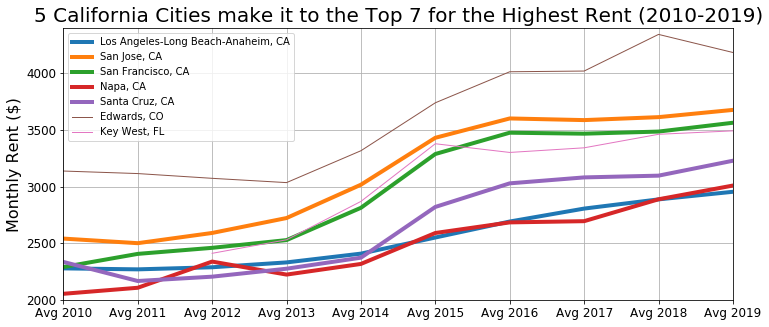

In [7]:
#Drawing line plots showing trend in monthly rents for the top 7 cities with the highest rents
city1 = highest_rent.iloc[6]
city1.plot(kind='line', figsize=(12, 5), label="Los Angeles-Long Beach-Anaheim, CA", linewidth=4)

city2 = highest_rent.iloc[1]
city2.plot(kind='line', label="San Jose, CA", linewidth=4)

city3 = highest_rent.iloc[2]
city3.plot(kind='line', label="San Francisco, CA", linewidth=4)

city4 = highest_rent.iloc[5]
city4.plot(kind='line', label="Napa, CA", linewidth=4)

city5 = highest_rent.iloc[4]
city5.plot(kind='line', label="Santa Cruz, CA", linewidth=4)

city6 = highest_rent.iloc[0]
city6.plot(kind='line', label="Edwards, CO", linewidth=1)

city6 = highest_rent.iloc[3]
city6.plot(kind='line', label="Key West, FL", linewidth=1)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.title("5 California Cities make it to the Top 7 for the Highest Rent (2010-2019)", size = 20)
plt.ylabel("Monthly Rent ($)", size = 16)
plt.ylim(2000, 4400)
plt.legend()
plt.grid()
plt.savefig("Median_rent_top7.png")



In [8]:
affordable_cities = highest_rent.loc[highest_rent["Avg 2019"] <= 2500]
affordable_cities.head()

,Avg 2010,Avg 2011,Avg 2012,Avg 2013,Avg 2014,Avg 2015,Avg 2016,Avg 2017,Avg 2018,Avg 2019
RegionName,,,,,,,,,,
"Boston, MA",1851.5,1871.916667,1957.500000,2028.583333,2115.833333,2256.750000,2363.583333,2426.250000,2441.000000,2466.8
"New York, NY",NaN,2067.500000,2033.166667,2129.166667,2215.416667,2349.583333,2424.166667,2416.416667,2423.833333,2459.4
"Boulder, CO",1814.0,1961.500000,2018.250000,2133.416667,2176.583333,2313.750000,2366.500000,2295.083333,2328.416667,2383.2
"Seattle, WA",1609.0,1612.750000,1631.750000,1696.750000,1816.500000,1941.333333,2113.333333,2231.166667,2248.583333,2308.2
"Washington, DC",2100.0,2110.333333,2145.250000,2180.833333,2198.000000,2250.083333,2276.250000,2283.916667,2265.750000,2305.8


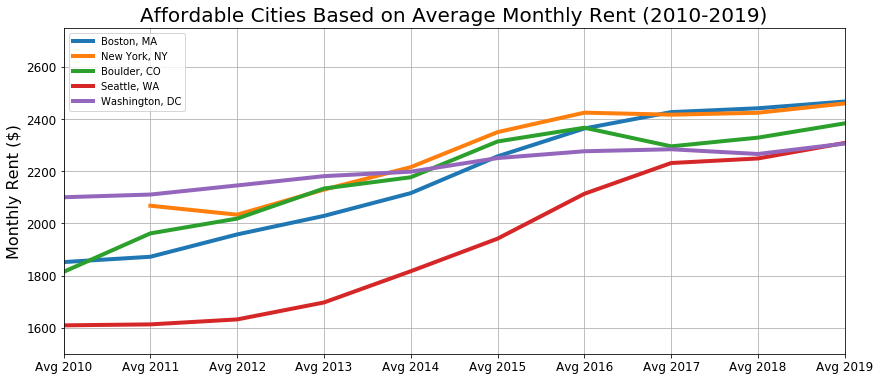

In [9]:
#Affordable cities

city3 = affordable_cities.iloc[0]
city3.plot(kind='line', figsize=(14, 6), label="Boston, MA", linewidth=4)

city4 = affordable_cities.iloc[1]
city4.plot(kind='line', label="New York, NY", linewidth=4)

city5 = affordable_cities.iloc[2]
city5.plot(kind='line', label="Boulder, CO", linewidth=4)

city6 = affordable_cities.iloc[3]
city6.plot(kind='line', label="Seattle, WA", linewidth=4)

city7 = affordable_cities.iloc[4]
city7.plot(kind='line', label="Washington, DC", linewidth=4)

plt.xticks(size = 12)
plt.yticks(size = 12)
plt.title("Affordable Cities Based on Average Monthly Rent (2010-2019)", size = 20)
plt.ylabel("Monthly Rent ($)", size = 16)
plt.ylim(1500, 2750)
plt.legend()
plt.grid()
plt.savefig("Affordable5.png")


In [10]:
#calculate CAGR for growth in rents from 2010 to 2018
highest_rent_renamed = highest_rent
highest_rent_renamed["CAGR_Rent"] = (highest_rent_renamed["Avg 2018"] / highest_rent_renamed["Avg 2010"])**(1/8) - 1
highest_rent_renamed.head()
highest_rent_CAGR = pd.DataFrame(highest_rent_renamed["CAGR_Rent"])
highest_rent_CAGR.head()

,CAGR_Rent
RegionName,
"Edwards, CO",0.041513
"San Jose, CA",0.045003
"San Francisco, CA",0.053936
"Key West, FL",NaN
"Santa Cruz, CA",0.035930


In [11]:
#sorting data to find cities with the lowest rents
lowest_rent = median_rental_metro_final.sort_values("Avg 2019")
lowest_rent.head()

,Avg 2010,Avg 2011,Avg 2012,Avg 2013,Avg 2014,Avg 2015,Avg 2016,Avg 2017,Avg 2018,Avg 2019
RegionName,,,,,,,,,,
"Muskogee, OK",NaN,NaN,758.000000,741.166667,751.000000,757.666667,779.750000,705.333333,649.833333,667.2
"Altus, OK",695.0,691.083333,706.416667,724.083333,765.000000,769.666667,764.166667,739.000000,714.500000,672.2
"Johnstown, PA",914.0,929.166667,934.000000,952.333333,693.083333,647.666667,688.666667,703.166667,680.416667,678.4
"Coffeyville, KS",677.0,648.666667,712.833333,697.416667,722.500000,709.333333,676.000000,669.166667,650.416667,683.0
"Pittsburg, KS",723.5,702.500000,765.166667,786.250000,792.083333,777.333333,669.666667,726.250000,692.250000,695.0


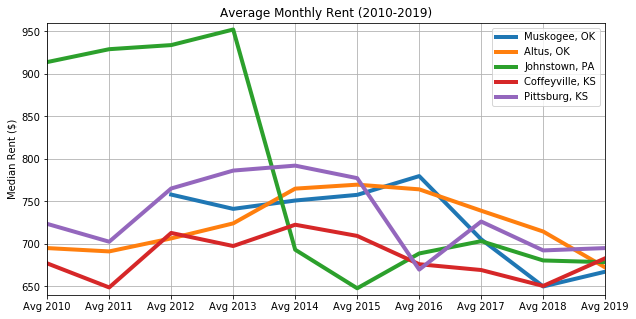

In [12]:
#drawing a plot to show cities with the lowest rents
city1 = lowest_rent.iloc[0]
city1.plot(kind='line', figsize=(10, 5), label="Muskogee, OK", linewidth=4)

city2 = lowest_rent.iloc[1]
city2.plot(kind='line', label="Altus, OK", linewidth=4)

city3 = lowest_rent.iloc[2]
city3.plot(kind='line', label="Johnstown, PA", linewidth=4)

city4 = lowest_rent.iloc[3]
city4.plot(kind='line', label="Coffeyville, KS", linewidth=4)

city5 = lowest_rent.iloc[4]
city5.plot(kind='line', label="Pittsburg, KS", linewidth=4)
plt.title("Average Monthly Rent (2010-2019)")
plt.ylabel("Median Rent ($)")
plt.ylim(640, 960)
plt.legend()
plt.grid()
plt.savefig("Median_rent_bottom5.png")

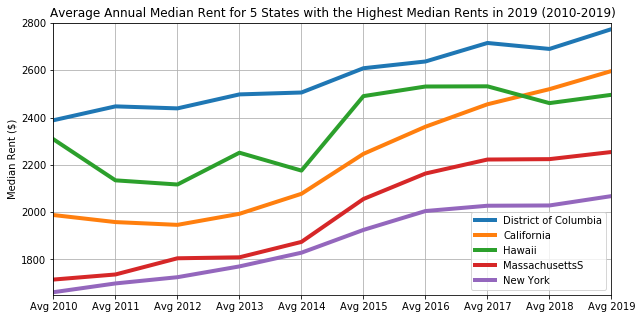

In [13]:
# reading csv file with state-wise data on rents
file21 = 'State_Zri_SingleFamilyResidenceRental.csv'
median_rental_state = pd.read_csv(file21, encoding="ISO-8859-1")
#to determine columns in the dataset
median_rental_state.head()

#Calculating the annual averages for each state
median_rental_state['Avg 2010'] = median_rental_state[["2010-11","2010-12"]].mean(axis=1)
median_rental_state['Avg 2011'] = median_rental_state[["2011-01","2011-02", "2011-03","2011-04","2011-05","2011-06","2011-07","2011-08","2011-09","2011-10","2011-11","2011-12"]].mean(axis=1)
median_rental_state['Avg 2012'] = median_rental_state[["2012-01","2012-02", "2012-03","2012-04","2012-05","2012-06","2012-07","2012-08","2012-09","2012-10","2012-11","2012-12"]].mean(axis=1)
median_rental_state['Avg 2013'] = median_rental_state[["2013-01","2013-02", "2013-03","2013-04","2013-05","2013-06","2013-07","2013-08","2013-09","2013-10","2013-11","2013-12"]].mean(axis=1)
median_rental_state['Avg 2014'] = median_rental_state[["2014-01","2014-02", "2014-03","2014-04","2014-05","2014-06","2014-07","2014-08","2014-09","2014-10","2014-11","2014-12"]].mean(axis=1)
median_rental_state['Avg 2015'] = median_rental_state[["2015-01","2015-02", "2015-03","2015-04","2015-05","2015-06","2015-07","2015-08","2015-09","2015-10","2015-11","2015-12"]].mean(axis=1)
median_rental_state['Avg 2016'] = median_rental_state[["2016-01","2016-02", "2016-03","2016-04","2016-05","2016-06","2016-07","2016-08","2016-09","2016-10","2016-11","2016-12"]].mean(axis=1)
median_rental_state['Avg 2017'] = median_rental_state[["2017-01","2017-02", "2017-03","2017-04","2017-05","2017-06","2017-07","2017-08","2017-09","2017-10","2017-11","2017-12"]].mean(axis=1)
median_rental_state['Avg 2018'] = median_rental_state[["2018-01","2018-02", "2018-03","2018-04","2018-05","2018-06","2018-07","2018-08","2018-09","2018-10","2018-11","2018-12"]].mean(axis=1)
median_rental_state['Avg 2019'] = median_rental_state[["2019-01","2019-02", "2019-03","2019-04","2019-05"]].mean(axis=1)
median_rental_state_reduced = median_rental_state[["RegionName","Avg 2010", "Avg 2011", "Avg 2012", "Avg 2013", "Avg 2014", "Avg 2015", "Avg 2016", "Avg 2017", "Avg 2018", "Avg 2019" ]]
median_rental_state_reduced.set_index('RegionName', inplace=True)
median_rental_state_reduced.head()
highest_rent_state = median_rental_state_reduced.sort_values("Avg 2019", ascending = False)

#plotting line graphs for 5 states with the highest median rents in 2019
state1 = highest_rent_state.iloc[0]
state1.plot(kind='line', figsize=(10, 5), label="District of Columbia", linewidth=4)

state2 = highest_rent_state.iloc[1]
state2.plot(kind='line', label="California", linewidth=4)

state3 = highest_rent_state.iloc[2]
state3.plot(kind='line', label="Hawaii", linewidth=4)

state4 = highest_rent_state.iloc[3]
state4.plot(kind='line', label="MassachusettsS", linewidth=4)

state5 = highest_rent_state.iloc[4]
state5.plot(kind='line', label="New York", linewidth=4)

plt.title("Average Annual Median Rent for 5 States with the Highest Median Rents in 2019 (2010-2019)")
plt.ylabel("Median Rent ($)")
plt.ylim(1650, 2800)
plt.legend()
plt.grid()
plt.savefig("Median_rent_top5states.png")

In [14]:
#reading csv file with city-wise data on median incomes
file24 = 'Affordability_Income_2018Q4.csv'
median_income = pd.read_csv(file24, encoding="ISO-8859-1")
#sorting data to find cities with highest median incomes
highest_income = median_income.sort_values("2018-12", ascending = False)
#reducing dataframe by deleting columns not required
highest_income_reduced = highest_income.drop(['RegionID', 'SizeRank'], axis=1)
#setting index as RegionName
highest_income_reduced.set_index('RegionName', inplace=True)
highest_income_reduced.head()

,1979-03,1979-06,1979-09,1979-12,1980-03,1980-06,1980-09,1980-12,1981-03,1981-06,...,2016-09,2016-12,2017-03,2017-06,2017-09,2017-12,2018-03,2018-06,2018-09,2018-12
RegionName,,,,,,,,,,,,,,,,,,,,,
"San Jose, CA",22459.47,22946.92,23531.51,24106.90,24782.67,25428.45,26025.05,26594.73,27169.14,27662.99,...,110556.66,112358.40,114456.82,116570.37,118454.77,120414.69,121388.698967,122362.707935,123336.716902,124310.725869
"San Francisco, CA",19341.49,19762.02,20232.43,20659.18,21190.51,21677.40,22123.68,22548.41,22976.73,23338.20,...,96297.22,97658.01,99269.76,100886.04,102450.25,104245.91,105089.133125,105932.356249,106775.579374,107618.802498
"Washington, DC",22611.34,23095.61,23441.83,23673.91,24067.25,24372.23,24646.77,24997.88,25485.86,25835.85,...,96541.67,97337.81,98291.83,99239.91,100118.33,101025.80,101670.895085,102315.990170,102961.085255,103606.180341
"Stamford, CT",22232.18,22665.30,23195.90,23750.61,24501.06,25182.26,25801.67,26379.01,26993.92,27553.13,...,89732.02,89693.69,90162.37,90837.84,91629.87,92161.92,92947.390909,93732.861818,94518.332727,95303.803636
"Napa, CA",18254.12,18660.55,19112.36,19520.98,20011.12,20477.42,20855.44,21161.03,21472.49,21720.98,...,79543.78,81418.46,83514.34,85605.85,87552.12,89575.69,90300.248817,91024.807634,91749.366450,92473.925267


In [15]:
#calculating annual averages for median income
highest_income_reduced['Avg 2000'] = highest_income_reduced[["2000-03","2000-06", "2000-09", "2000-12"]].mean(axis=1)
highest_income_reduced['Avg 2001'] = highest_income_reduced[["2001-03","2001-06", "2001-09", "2001-12"]].mean(axis=1)
highest_income_reduced['Avg 2002'] = highest_income_reduced[["2002-03","2002-06", "2002-09", "2002-12"]].mean(axis=1)
highest_income_reduced['Avg 2003'] = highest_income_reduced[["2003-03","2003-06", "2003-09", "2003-12"]].mean(axis=1)
highest_income_reduced['Avg 2004'] = highest_income_reduced[["2004-03","2004-06", "2004-09", "2004-12"]].mean(axis=1)
highest_income_reduced['Avg 2005'] = highest_income_reduced[["2005-03","2005-06", "2005-09", "2005-12"]].mean(axis=1)
highest_income_reduced['Avg 2006'] = highest_income_reduced[["2006-03","2006-06", "2006-09", "2006-12"]].mean(axis=1)
highest_income_reduced['Avg 2007'] = highest_income_reduced[["2007-03","2007-06", "2007-09", "2007-12"]].mean(axis=1)
highest_income_reduced['Avg 2008'] = highest_income_reduced[["2008-03","2008-06", "2008-09", "2008-12"]].mean(axis=1)
highest_income_reduced['Avg 2009'] = highest_income_reduced[["2009-03","2009-06", "2009-09", "2009-12"]].mean(axis=1)
highest_income_reduced['Avg 2010'] = highest_income_reduced[["2010-03","2010-06", "2010-09", "2010-12"]].mean(axis=1)
highest_income_reduced['Avg 2011'] = highest_income_reduced[["2011-03","2011-06", "2011-09", "2011-12"]].mean(axis=1)
highest_income_reduced['Avg 2012'] = highest_income_reduced[["2012-03","2012-06", "2012-09", "2012-12"]].mean(axis=1)
highest_income_reduced['Avg 2013'] = highest_income_reduced[["2013-03","2013-06", "2013-09", "2013-12"]].mean(axis=1)
highest_income_reduced['Avg 2014'] = highest_income_reduced[["2014-03","2014-06", "2014-09", "2014-12"]].mean(axis=1)
highest_income_reduced['Avg 2015'] = highest_income_reduced[["2015-03","2015-06", "2015-09", "2015-12"]].mean(axis=1)
highest_income_reduced['Avg 2016'] = highest_income_reduced[["2016-03","2016-06", "2016-09", "2016-12"]].mean(axis=1)
highest_income_reduced['Avg 2017'] = highest_income_reduced[["2017-03","2017-06", "2017-09", "2017-12"]].mean(axis=1)
highest_income_reduced['Avg 2018'] = highest_income_reduced[["2018-03","2018-06", "2018-09", "2018-12"]].mean(axis=1)
highest_income_reduced_avg = highest_income_reduced[['Avg 2000','Avg 2001','Avg 2002','Avg 2003','Avg 2004','Avg 2005','Avg 2006', 'Avg 2007', 'Avg 2008', 'Avg 2009', 'Avg 2010', 'Avg 2011', 'Avg 2012', 'Avg 2013', 'Avg 2014', 'Avg 2015', 'Avg 2016', 'Avg 2017', 'Avg 2018']]
highest_income_avg = highest_income_reduced_avg.sort_values("Avg 2018", ascending = False)
#highest_income_avg["% increase"] = (highest_income_avg['Avg 2018']*100 - highest_income_avg['Avg 2010'])/highest_income_avg['Avg 2010']
highest_income_avg.head()

,Avg 2000,Avg 2001,Avg 2002,Avg 2003,Avg 2004,Avg 2005,Avg 2006,Avg 2007,Avg 2008,Avg 2009,Avg 2010,Avg 2011,Avg 2012,Avg 2013,Avg 2014,Avg 2015,Avg 2016,Avg 2017,Avg 2018
RegionName,,,,,,,,,,,,,,,,,,,
"San Jose, CA",76702.2900,76454.1300,73426.5775,71277.7750,72652.3275,76067.3850,80302.8650,84176.1600,85458.1150,85506.8175,84145.8450,86230.1750,88762.0750,92916.4450,96665.2625,102835.0425,109832.3950,117474.1625,122849.712418
"San Francisco, CA",63370.8725,63979.5100,62692.1775,61894.9650,63083.0475,66079.8200,69808.8425,73630.6475,74751.3925,74566.1025,72941.8175,73306.6650,75507.6100,79256.0225,83788.8950,89473.7025,95635.6575,101712.9900,106353.967811
"Washington, DC",66657.2000,68446.3125,69151.9375,70133.0175,73493.3025,77290.6650,81809.1375,85135.6575,86832.8775,86970.4575,87098.8725,88025.0625,89413.1075,90192.0075,91545.3475,93443.4875,96268.6925,99668.9675,102638.537713
"Stamford, CT",67678.4400,68349.3175,67015.9325,65617.0250,68416.5325,73572.5025,79989.3025,84083.0575,84572.4550,82319.8425,79464.4600,79317.4825,81399.6200,83829.9175,85723.1025,88058.2550,89594.3500,91198.0000,94125.597273
"Napa, CA",53811.1225,54868.7075,54670.2475,55144.2075,58823.9975,62826.2750,65814.7050,66418.7175,67505.0975,67726.1000,66363.9175,65830.1875,67721.6025,71046.0875,73359.5675,74806.6500,79116.8175,86562.0000,91387.087042


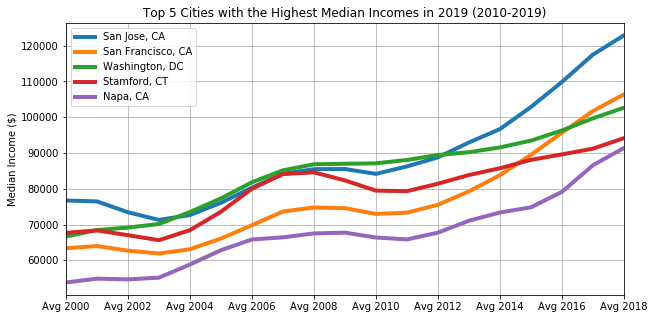

In [16]:
#draw line plots for median incomes for top 5 cities with highest incomes
city1 = highest_income_avg.iloc[0]
city1.plot(kind='line', figsize=(10, 5), label="San Jose, CA", linewidth=4)

city2 = highest_income_avg.iloc[1]
city2.plot(kind='line', label="San Francisco, CA", linewidth=4)

city3 = highest_income_avg.iloc[2]
city3.plot(kind='line', label="Washington, DC", linewidth=4)

city4 = highest_income_avg.iloc[3]
city4.plot(kind='line', label="Stamford, CT", linewidth=4)

city5 = highest_income_avg.iloc[4]
city5.plot(kind='line', label="Napa, CA", linewidth=4)

plt.title("Top 5 Cities with the Highest Median Incomes in 2019 (2010-2019)")
plt.ylabel("Median Income ($)")

plt.legend()
plt.grid()
plt.savefig("Median_income_top5cities.png")

In [17]:
#calculate the CAGR for median income from 2010 to 2018
highest_income_renamed = highest_income_avg
highest_income_renamed["CAGR_INC"] = (highest_income_renamed["Avg 2018"] / highest_income_renamed["Avg 2010"])**(1/8) - 1
highest_income_CAGR = highest_income_renamed[["CAGR_INC"]]
highest_income_CAGR.head()

,CAGR_INC
RegionName,
"San Jose, CA",0.048438
"San Francisco, CA",0.048268
"Washington, DC",0.020733
"Stamford, CT",0.021391
"Napa, CA",0.040804


In [18]:
#reading csv file with data on rent affordability
file2 = 'affordability.csv'
affordability = pd.read_csv(file2, encoding="ISO-8859-1")
affordability.head()

,RegionID,RegionName,SizeRank,Index,HistoricAverage_1985thru1999,1979-03,1979-06,1979-09,1979-12,1980-03,...,2016-12,2017-03,2017-06,2017-09,2017-12,2018-03,2018-06,2018-09,2018-12,2019-03
0,102001,United States,0,Price To Income,2.763961,2.903439,2.939274,2.941948,2.946569,2.934412,...,3.322458,3.333000,3.357272,3.373318,3.381735,3.434020,3.475955,3.509347,3.551774,3.562198
1,394913,"New York, NY",1,Price To Income,3.893124,2.928344,2.956635,2.966927,2.961860,3.007144,...,5.330116,5.327888,5.387242,5.405203,5.416009,5.465964,5.485629,5.482092,5.515186,5.530238
2,753899,"Los Angeles-Long Beach-Anaheim, CA",2,Price To Income,4.471735,4.019673,4.141217,4.208146,4.278269,4.308551,...,8.686866,8.669735,8.653635,8.719940,8.785096,8.904177,8.906760,8.917544,8.917269,8.830346
3,394463,"Chicago, IL",3,Price To Income,2.958478,3.035758,3.045651,2.984501,2.973171,2.895068,...,3.047477,3.052308,3.065096,3.072588,3.088122,3.130550,3.134038,3.126196,3.138068,3.145604
4,394514,"Dallas-Fort Worth, TX",4,Price To Income,3.068857,3.887457,4.025835,4.101038,4.130605,4.135414,...,2.999365,3.033888,3.074540,3.112127,3.149799,3.261339,3.318315,3.357463,3.431827,3.475607


In [19]:
#extract data based on rent affordability index
rent_affordability = affordability.loc[affordability["Index"] == "Rent Affordability"]
rent_affordability.head()

,RegionID,RegionName,SizeRank,Index,HistoricAverage_1985thru1999,1979-03,1979-06,1979-09,1979-12,1980-03,...,2016-12,2017-03,2017-06,2017-09,2017-12,2018-03,2018-06,2018-09,2018-12,2019-03
740,102001,United States,0,Rent Affordability,0.258183,0.247882,0.246564,0.245143,0.244196,0.242397,...,0.288895,0.283947,0.284392,0.285077,0.281079,0.278727,0.277178,0.275268,0.277181,0.277936
741,394913,"New York, NY",1,Rent Affordability,0.263950,0.273188,0.271734,0.270130,0.268684,0.265878,...,0.395206,0.385103,0.378561,0.381813,0.377727,0.369670,0.365281,0.361574,0.364434,0.363194
742,753899,"Los Angeles-Long Beach-Anaheim, CA",2,Rent Affordability,0.363199,0.328321,0.326380,0.322956,0.319593,0.314773,...,0.468601,0.462133,0.461164,0.464402,0.460849,0.458526,0.456734,0.453155,0.458789,0.460770
743,394463,"Chicago, IL",3,Rent Affordability,0.252810,0.236565,0.234922,0.232827,0.231825,0.230287,...,0.294865,0.285892,0.288504,0.290885,0.286055,0.281106,0.278954,0.276662,0.280956,0.282187
744,394514,"Dallas-Fort Worth, TX",4,Rent Affordability,0.217046,0.229115,0.228932,0.227194,0.224199,0.220723,...,0.287019,0.283123,0.284010,0.283762,0.280027,0.277605,0.275902,0.274217,0.278196,0.279580


In [20]:
#deleting rows not used in the analysis
affordability_final = rent_affordability.drop(['RegionID', 'SizeRank', 'Index', 'HistoricAverage_1985thru1999'], axis=1)
#Setting 'RegionName' as Index
affordability_final.set_index('RegionName', inplace=True)
#determining cities with lowest rent affordability
lowest_rent_affordability = affordability_final.sort_values("2019-03", ascending = False)
lowest_rent_affordability.head()

,1979-03,1979-06,1979-09,1979-12,1980-03,1980-06,1980-09,1980-12,1981-03,1981-06,...,2016-12,2017-03,2017-06,2017-09,2017-12,2018-03,2018-06,2018-09,2018-12,2019-03
RegionName,,,,,,,,,,,,,,,,,,,,,
"Los Angeles-Long Beach-Anaheim, CA",0.328321,0.326380,0.322956,0.319593,0.314773,0.315783,0.318154,0.321596,0.324591,0.328685,...,0.468601,0.462133,0.461164,0.464402,0.460849,0.458526,0.456734,0.453155,0.458789,0.460770
"Santa Cruz, CA",0.340030,0.336403,0.333850,0.333914,0.332589,0.336894,0.340838,0.344102,0.347155,0.351134,...,0.451033,0.446597,0.451369,0.457424,0.444055,0.439384,0.435945,0.432554,0.440545,0.444719
"Salinas, CA",0.307271,0.304631,0.302602,0.302589,0.301317,0.305150,0.308653,0.311535,0.314230,0.317763,...,0.415002,0.406928,0.404489,0.403169,0.401067,0.400605,0.398378,0.396023,0.405762,0.411739
"Miami-Fort Lauderdale, FL",0.267148,0.266200,0.265005,0.264925,0.262356,0.262298,0.262950,0.265252,0.266818,0.269027,...,0.425479,0.414519,0.410184,0.407346,0.404622,0.404112,0.400591,0.397324,0.403465,0.407420
"San Diego, CA",0.318509,0.316489,0.313395,0.310709,0.306884,0.308376,0.310298,0.312365,0.314282,0.317050,...,0.400899,0.394516,0.395182,0.397146,0.391032,0.387446,0.385125,0.382385,0.389396,0.392748


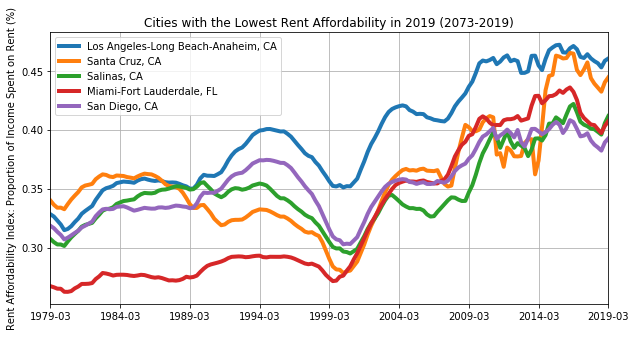

In [21]:
#drawing plots for cities with the lowest rent affordability
city1 = lowest_rent_affordability.iloc[0]
city1.plot(kind='line', figsize=(10, 5), label="Los Angeles-Long Beach-Anaheim, CA", linewidth=4)

city2 = lowest_rent_affordability.iloc[1]
city2.plot(kind='line', label="Santa Cruz, CA", linewidth=4)

city3 = lowest_rent_affordability.iloc[2]
city3.plot(kind='line', label="Salinas, CA", linewidth=4)

city4 = lowest_rent_affordability.iloc[3]
city4.plot(kind='line', label="Miami-Fort Lauderdale, FL", linewidth=4)

city5 = lowest_rent_affordability.iloc[4]
city5.plot(kind='line', label="San Diego, CA", linewidth=4)

plt.title("Cities with the Lowest Rent Affordability in 2019 (2073-2019)")
plt.ylabel("Rent Affordability Index: Proportion of Income Spent on Rent (%)")

plt.legend()
plt.grid()
plt.savefig("Lowest_rent_affordability.png")


In [22]:
#calculate annual averages for rent affordability
lowest_rent_affordability['Avg 2000'] = lowest_rent_affordability[["2000-03","2000-06", "2000-09", "2000-12"]].mean(axis=1)
lowest_rent_affordability['Avg 2001'] = lowest_rent_affordability[["2001-03","2001-06", "2001-09", "2001-12"]].mean(axis=1)
lowest_rent_affordability['Avg 2002'] = lowest_rent_affordability[["2002-03","2002-06", "2002-09", "2002-12"]].mean(axis=1)
lowest_rent_affordability['Avg 2003'] = lowest_rent_affordability[["2003-03","2003-06", "2003-09", "2003-12"]].mean(axis=1)
lowest_rent_affordability['Avg 2004'] = lowest_rent_affordability[["2004-03","2004-06", "2004-09", "2004-12"]].mean(axis=1)
lowest_rent_affordability['Avg 2005'] = lowest_rent_affordability[["2005-03","2005-06", "2005-09", "2005-12"]].mean(axis=1)
lowest_rent_affordability['Avg 2006'] = lowest_rent_affordability[["2006-03","2006-06", "2006-09", "2006-12"]].mean(axis=1)
lowest_rent_affordability['Avg 2007'] = lowest_rent_affordability[["2007-03","2007-06", "2007-09", "2007-12"]].mean(axis=1)
lowest_rent_affordability['Avg 2008'] = lowest_rent_affordability[["2008-03","2008-06", "2008-09", "2008-12"]].mean(axis=1)
lowest_rent_affordability['Avg 2009'] = lowest_rent_affordability[["2009-03","2009-06", "2009-09", "2009-12"]].mean(axis=1)
lowest_rent_affordability['Avg 2010'] = lowest_rent_affordability[["2010-03","2010-06", "2010-09", "2010-12"]].mean(axis=1)
lowest_rent_affordability['Avg 2011'] = lowest_rent_affordability[["2011-03","2011-06", "2011-09", "2011-12"]].mean(axis=1)
lowest_rent_affordability['Avg 2012'] = lowest_rent_affordability[["2012-03","2012-06", "2012-09", "2012-12"]].mean(axis=1)
lowest_rent_affordability['Avg 2013'] = lowest_rent_affordability[["2013-03","2013-06", "2013-09", "2013-12"]].mean(axis=1)
lowest_rent_affordability['Avg 2014'] = lowest_rent_affordability[["2014-03","2014-06", "2014-09", "2014-12"]].mean(axis=1)
lowest_rent_affordability['Avg 2015'] = lowest_rent_affordability[["2015-03","2015-06", "2015-09", "2015-12"]].mean(axis=1)
lowest_rent_affordability['Avg 2016'] = lowest_rent_affordability[["2016-03","2016-06", "2016-09", "2016-12"]].mean(axis=1)
lowest_rent_affordability['Avg 2017'] = lowest_rent_affordability[["2017-03","2017-06", "2017-09", "2017-12"]].mean(axis=1)
lowest_rent_affordability['Avg 2018'] = lowest_rent_affordability[["2018-03","2018-06", "2018-09", "2018-12"]].mean(axis=1)
lowest_rent_affordability_reduced = lowest_rent_affordability[['Avg 2010', 'Avg 2011', 'Avg 2012', 'Avg 2013', 'Avg 2014', 'Avg 2015', 'Avg 2016', 'Avg 2017', 'Avg 2018']]
lowest_affordability_avg = lowest_rent_affordability_reduced.sort_values("Avg 2018", ascending = False)
lowest_affordability_avg.head()

,Avg 2010,Avg 2011,Avg 2012,Avg 2013,Avg 2014,Avg 2015,Avg 2016,Avg 2017,Avg 2018
RegionName,,,,,,,,,
"Los Angeles-Long Beach-Anaheim, CA",0.459500,0.459789,0.456265,0.456140,0.458485,0.470143,0.468783,0.462137,0.456801
"Santa Cruz, CA",0.409722,0.378212,0.378865,0.383786,0.414087,0.458289,0.460640,0.449861,0.437107
"Santa Rosa, CA",0.353349,0.344948,0.340271,0.352279,0.376461,0.399382,0.407445,0.390477,0.406559
"Miami-Fort Lauderdale, FL",0.407825,0.406423,0.409665,0.417040,0.426412,0.431120,0.432084,0.409168,0.401373
"Salinas, CA",0.388909,0.392366,0.387585,0.384566,0.396207,0.407577,0.417539,0.403913,0.400192


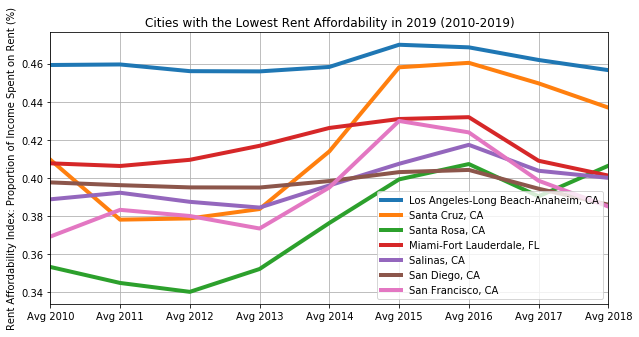

In [23]:
#draw line plots to show trend in average annual rent affordability
city1 = lowest_affordability_avg.iloc[0]
city1.plot(kind='line', figsize=(10, 5), label="Los Angeles-Long Beach-Anaheim, CA", linewidth=4)

city2 = lowest_affordability_avg.iloc[1]
city2.plot(kind='line', label="Santa Cruz, CA", linewidth=4)

city3 = lowest_affordability_avg.iloc[2]
city3.plot(kind='line', label="Santa Rosa, CA", linewidth=4)

city4 = lowest_affordability_avg.iloc[3]
city4.plot(kind='line', label="Miami-Fort Lauderdale, FL", linewidth=4)

city5 = lowest_affordability_avg.iloc[4]
city5.plot(kind='line', label="Salinas, CA", linewidth=4)

city6 = lowest_affordability_avg.iloc[6]
city6.plot(kind='line', label="San Diego, CA", linewidth=4)

city7 = lowest_affordability_avg.iloc[7]
city7.plot(kind='line', label="San Francisco, CA", linewidth=4)

plt.title("Cities with the Lowest Rent Affordability in 2019 (2010-2019)")
plt.ylabel("Rent Affordability Index: Proportion of Income Spent on Rent (%)")

plt.legend()
plt.grid()
plt.savefig("lowest_rent_affordability_avg.png")

In [24]:
merge_CAGR = pd.merge(highest_rent_CAGR, highest_income_CAGR, on = "RegionName")
merge_CAGR_affordability = pd.merge(merge_CAGR, lowest_affordability_avg, on = "RegionName")
worst_rent_affordability = merge_CAGR_affordability.loc[merge_CAGR_affordability["Avg 2018"] > 0.30]
worst_rent_affordability = worst_rent_affordability.dropna(how = "any")
#cities where growth in income has lagged growth in rents
worst_rent_affordability["CAGR_R - CAGR_INC"] = worst_rent_affordability["CAGR_Rent"] - worst_rent_affordability["CAGR_INC"]
worst_rent_affordability = worst_rent_affordability.loc[worst_rent_affordability["CAGR_R - CAGR_INC"] > 0.0]
worst_rent_affordability.head()

,CAGR_Rent,CAGR_INC,Avg 2010,Avg 2011,Avg 2012,Avg 2013,Avg 2014,Avg 2015,Avg 2016,Avg 2017,Avg 2018,CAGR_R - CAGR_INC
RegionName,,,,,,,,,,,,
"San Francisco, CA",0.053936,0.048268,0.369325,0.383371,0.380137,0.373568,0.395116,0.430094,0.424079,0.398680,0.385116,0.005668
"Santa Cruz, CA",0.035930,0.031693,0.409722,0.378212,0.378865,0.383786,0.414087,0.458289,0.460640,0.449861,0.437107,0.004237
"Santa Rosa, CA",0.053178,0.038312,0.353349,0.344948,0.340271,0.352279,0.376461,0.399382,0.407445,0.390477,0.406559,0.014866
"Boston, MA",0.035155,0.032408,0.309922,0.308466,0.318621,0.322549,0.327189,0.335097,0.335586,0.330776,0.319187,0.002747
"Seattle, WA",0.042723,0.036751,0.292942,0.289766,0.288179,0.290715,0.296582,0.300415,0.311904,0.315909,0.308961,0.005972


In [25]:
#determining variables for the plot
Worst_rent_aff = worst_rent_affordability["Avg 2018"]
rent = worst_rent_affordability["CAGR_Rent"]
income = worst_rent_affordability["CAGR_INC"]



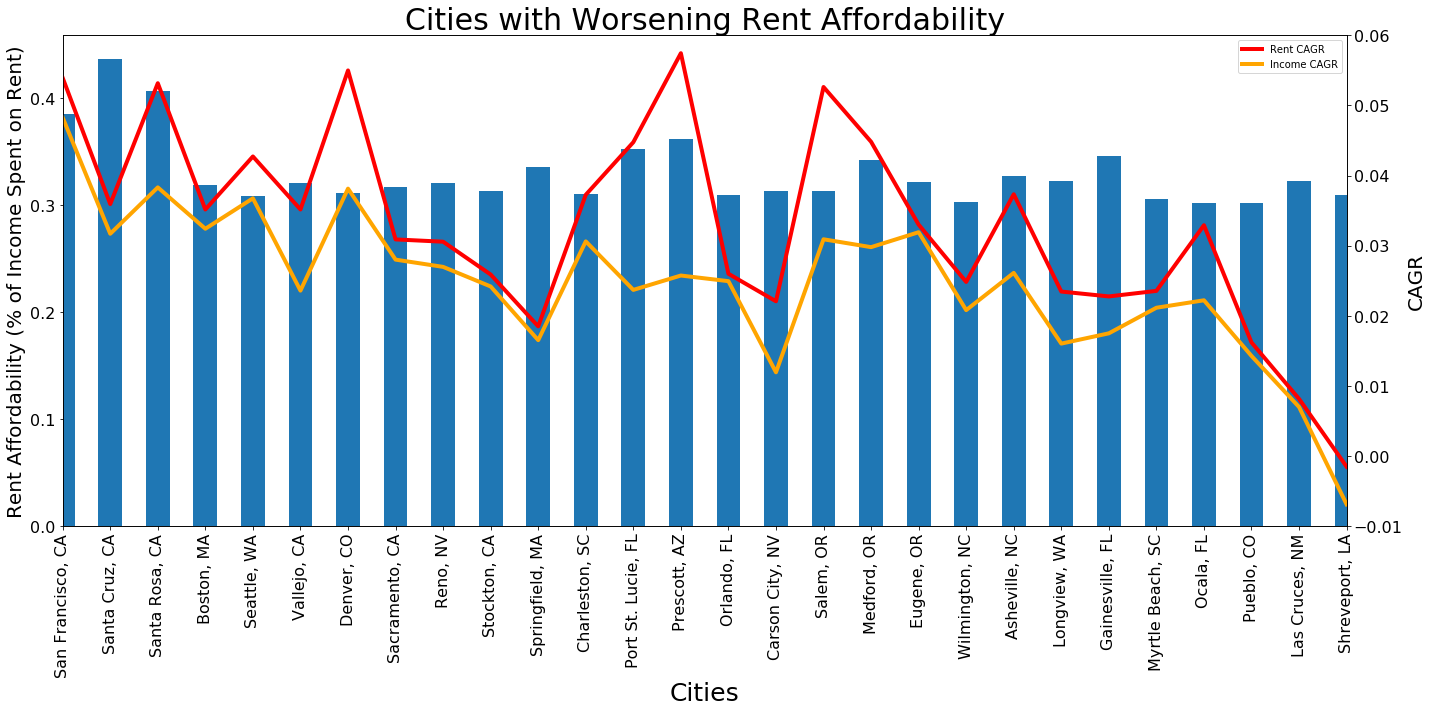

In [26]:
#drawing a plot with two y-axes
fig, ax1 = plt.subplots()

Worst_rent_aff.index.name = 'Cities'
plt.title("Cities with Worsening Rent Affordability", size = 30)
ax1.set_ylabel('Rent Affordability (% of Income Spent on Rent)', fontsize = 20)
ax1.set_xlabel('Cities', fontsize = 25)
ax1 = Worst_rent_aff.plot(kind="bar", label = "Rent Affordability", figsize=(20,10))
ax1.tick_params(axis="x", labelsize=16)
ax1.tick_params(axis="y", labelsize=16)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis


ax2.set_ylabel('CAGR', fontsize = 20)  # we already handled the x-label with ax1
ax2= rent.plot(kind="line", label = "Rent CAGR", color = "red", linewidth=4)
ax2 = income.plot(kind="line", label = "Income CAGR", color = "orange", linewidth=4)
ax2.set_ylim(bottom=-0.01, top=0.06)
ax2.tick_params(axis="y", labelsize=16)

plt.ylim(-0.01,0.06)
plt.legend()

fig.tight_layout()

plt.savefig("Cities_with_worsening_rent_affordability.png")
plt.show()

In [27]:
#read csv file from census.gov with population estimates
file25 = 'Population_census.csv'
Pop_cen = pd.read_csv(file25, encoding="ISO-8859-1")
Pop_cen.head()

,GEO.id,GEO.id2,GEO.display-label,GC_RANK.target-geo-id,GC_RANK.target-geo-id2,GC_RANK.rank-label,GC_RANK.display-label,GC_RANK.display-label.1,rescensus42010,resbase42010,respop72010,respop72011,respop72012,respop72013,respop72014,respop72015,respop72016,respop72017,respop72018
0,Id,Id2,Geography,Target Geo Id,Target Geo Id2,Rank,Geography,Geography,"April 1, 2010 - Census","April 1, 2010 - Estimates Base",Population Estimate (as of July 1) - 2010,Population Estimate (as of July 1) - 2011,Population Estimate (as of July 1) - 2012,Population Estimate (as of July 1) - 2013,Population Estimate (as of July 1) - 2014,Population Estimate (as of July 1) - 2015,Population Estimate (as of July 1) - 2016,Population Estimate (as of July 1) - 2017,Population Estimate (as of July 1) - 2018
1,0100000US,NaN,United States,1620000US3651000,3651000,1,"United States - NY, NY","New York, NY",8175133,8174988,8190355,8272963,8348032,8398739,8437387,8468181,8475976,8438271,8398748
2,0100000US,NaN,United States,1620000US0644000,644000,2,"United States - Los Angeles, CA","Los Angeles-Long Beach-Anaheim, CA",3792621,3792820,3795370,3821136,3852532,3883916,3913260,3943215,3969262,3982002,3990456
3,0100000US,NaN,United States,1620000US1714000,1714000,3,"United States - Chicago, IL","Chicago, IL",2695598,2695624,2697529,2708209,2719735,2726772,2728524,2726215,2718946,2713067,2705994
4,0100000US,NaN,United States,1620000US4835000,4835000,4,"United States - Houston, TX","Houston, TX",2099451,2093615,2098446,2124143,2160086,2198280,2240982,2286630,2309752,2317445,2325502


In [28]:
#delete columns not required
Pop_cen_reduced = Pop_cen[["GC_RANK.display-label.1", "rescensus42010","respop72013","respop72018" ]]
Pop_cen_reduced.head()

,GC_RANK.display-label.1,rescensus42010,respop72013,respop72018
0,Geography,"April 1, 2010 - Census",Population Estimate (as of July 1) - 2013,Population Estimate (as of July 1) - 2018
1,"New York, NY",8175133,8398739,8398748
2,"Los Angeles-Long Beach-Anaheim, CA",3792621,3883916,3990456
3,"Chicago, IL",2695598,2726772,2705994
4,"Houston, TX",2099451,2198280,2325502


In [29]:
Pop_cen_reduced = Pop_cen_reduced[Pop_cen_reduced.index != 0]
Pop_cen_reduced.head()

,GC_RANK.display-label.1,rescensus42010,respop72013,respop72018
1,"New York, NY",8175133,8398739,8398748
2,"Los Angeles-Long Beach-Anaheim, CA",3792621,3883916,3990456
3,"Chicago, IL",2695598,2726772,2705994
4,"Houston, TX",2099451,2198280,2325502
5,"Phoenix, AZ",1445632,1527336,1660272


In [30]:
#change string to float format
Pop_cen_reduced["respop72013"] = Pop_cen_reduced["respop72013"].astype(float)
Pop_cen_reduced["respop72018"] = Pop_cen_reduced["respop72018"].astype(float)
Pop_cen_reduced["rescensus42010"] = Pop_cen_reduced["rescensus42010"].astype(float)
Pop_cen_reduced["% Change in Population"] = (Pop_cen_reduced["respop72018"] - Pop_cen_reduced["rescensus42010"])*100/Pop_cen_reduced["rescensus42010"]
Pop_cen_reduced.head()

,GC_RANK.display-label.1,rescensus42010,respop72013,respop72018,% Change in Population
1,"New York, NY",8175133.0,8398739.0,8398748.0,2.735307
2,"Los Angeles-Long Beach-Anaheim, CA",3792621.0,3883916.0,3990456.0,5.216313
3,"Chicago, IL",2695598.0,2726772.0,2705994.0,0.385666
4,"Houston, TX",2099451.0,2198280.0,2325502.0,10.767148
5,"Phoenix, AZ",1445632.0,1527336.0,1660272.0,14.847485


In [31]:
#rename columns
Pop_cen_reduced_renamed = Pop_cen_reduced.rename(columns={
    "GC_RANK.display-label.1": "RegionName",
    "respop72013": "Pop 2013",
    "respop72018": "Pop 2018",
    "rescensus42010": "Pop 2010"
})
Pop_cen_reduced_renamed.head()

,RegionName,Pop 2010,Pop 2013,Pop 2018,% Change in Population
1,"New York, NY",8175133.0,8398739.0,8398748.0,2.735307
2,"Los Angeles-Long Beach-Anaheim, CA",3792621.0,3883916.0,3990456.0,5.216313
3,"Chicago, IL",2695598.0,2726772.0,2705994.0,0.385666
4,"Houston, TX",2099451.0,2198280.0,2325502.0,10.767148
5,"Phoenix, AZ",1445632.0,1527336.0,1660272.0,14.847485


In [32]:
#merge rent affordability and population data to determine correlation between the two
merge_rent_affordability_Pop = pd.merge(rent_affordability, Pop_cen_reduced_renamed, on= "RegionName")
merge_rent_affordability_Pop.head()

,RegionID,RegionName,SizeRank,Index,HistoricAverage_1985thru1999,1979-03,1979-06,1979-09,1979-12,1980-03,...,2017-12,2018-03,2018-06,2018-09,2018-12,2019-03,Pop 2010,Pop 2013,Pop 2018,% Change in Population
0,394913,"New York, NY",1,Rent Affordability,0.263950,0.273188,0.271734,0.270130,0.268684,0.265878,...,0.377727,0.369670,0.365281,0.361574,0.364434,0.363194,8175133.0,8398739.0,8398748.0,2.735307
1,753899,"Los Angeles-Long Beach-Anaheim, CA",2,Rent Affordability,0.363199,0.328321,0.326380,0.322956,0.319593,0.314773,...,0.460849,0.458526,0.456734,0.453155,0.458789,0.460770,3792621.0,3883916.0,3990456.0,5.216313
2,394463,"Chicago, IL",3,Rent Affordability,0.252810,0.236565,0.234922,0.232827,0.231825,0.230287,...,0.286055,0.281106,0.278954,0.276662,0.280956,0.282187,2695598.0,2726772.0,2705994.0,0.385666
3,394514,"Dallas-Fort Worth, TX",4,Rent Affordability,0.217046,0.229115,0.228932,0.227194,0.224199,0.220723,...,0.280027,0.277605,0.275902,0.274217,0.278196,0.279580,1197816.0,1259239.0,1345047.0,12.291621
4,394974,"Philadelphia, PA",5,Rent Affordability,0.213941,0.225178,0.224333,0.223042,0.222241,0.219884,...,0.274268,0.269614,0.267252,0.264929,0.267341,0.267718,1526006.0,1558371.0,1584138.0,3.809421


In [33]:
#calculate varaiables for analysis
merge_rent_affordability_Pop["Avg 2010"] = merge_rent_affordability_Pop[["2010-03","2010-06", "2010-09", "2010-12"]].mean(axis=1)
merge_rent_affordability_Pop["Avg 2018"] = merge_rent_affordability_Pop[["2018-03","2018-06", "2018-09", "2018-12"]].mean(axis=1)
merge_rent_affordability_Pop["Change in Affordability"] = merge_rent_affordability_Pop["Avg 2018"] - merge_rent_affordability_Pop["Avg 2010"]

In [34]:
#reduced meged data for analysis
new_merged = merge_rent_affordability_Pop[["RegionName", "Change in Affordability", "% Change in Population"]]
new_merged.head()

,RegionName,Change in Affordability,% Change in Population
0,"New York, NY",0.006470,2.735307
1,"Los Angeles-Long Beach-Anaheim, CA",-0.002699,5.216313
2,"Chicago, IL",-0.039977,0.385666
3,"Dallas-Fort Worth, TX",0.000338,12.291621
4,"Philadelphia, PA",-0.029461,3.809421


In [35]:
#calculate correlation coefficient
CC = new_merged['Change in Affordability'].corr(new_merged['% Change in Population'])
CC

0.38384496198563856

In [36]:
#linear regression for relation between change in rent affordability and %change in population
pop = new_merged.iloc[:, 2]
rent = new_merged.iloc[:, 1]
rent_slope, rent_int, rent_r, rent_p, rent_std_err = stats.linregress(
    pop, rent)
rent_fit = rent_slope * pop + rent_int
rent_slope

0.0016973232236025904

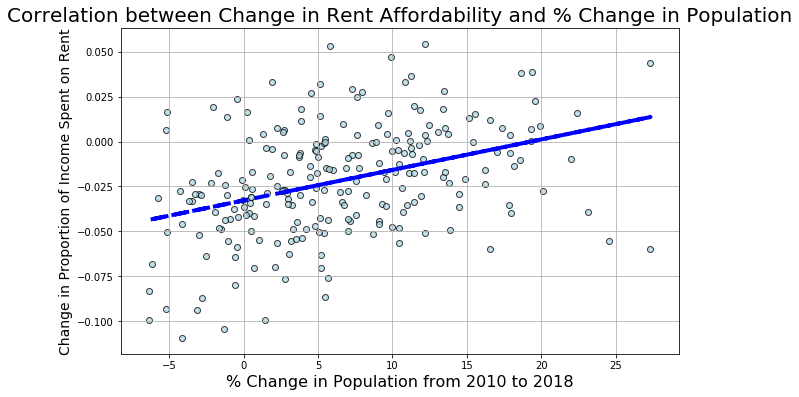

In [37]:
#draw a scatter plot and fit plot
plt.figure(figsize=(10, 6))
fit_plot = plt.plot(pop, rent_fit, "b--", linewidth=4)
chart2 = plt.scatter(new_merged["% Change in Population"], new_merged["Change in Affordability"], marker="o", facecolors="lightblue", edgecolors="black", alpha = 0.75)
plt.title("Correlation between Change in Rent Affordability and % Change in Population", size = 20)
plt.ylabel("Change in Proportion of Income Spent on Rent", size = 14)
plt.xlabel("% Change in Population from 2010 to 2018", size = 16)
plt.grid()

plt.savefig("Correlation_between_rentafford_and_pop.png")
plt.show()


In [38]:
rent_change = highest_rent
rent_change["%Change"] = (rent_change["Avg 2018"] - rent_change["Avg 2010"])*100/rent_change["Avg 2010"]
rent_change_df = pd.DataFrame(rent_change["%Change"])
rent_change_df.head()

,%Change
RegionName,
"Edwards, CO",38.457656
"San Jose, CA",42.212819
"San Francisco, CA",52.234840
"Key West, FL",NaN
"Santa Cruz, CA",32.630114


In [39]:
merge_rent_pop = pd.merge(rent_change_df, Pop_cen_reduced_renamed, on= "RegionName")
merge_rent_pop = merge_rent_pop.dropna(how = "any")
merge_rent_pop.head()

,RegionName,%Change,Pop 2010,Pop 2013,Pop 2018,% Change in Population
0,"San Jose, CA",42.212819,945942.0,1001253.0,1030119.0,8.898749
1,"San Francisco, CA",52.234840,805235.0,839841.0,883305.0,9.695306
2,"Santa Cruz, CA",32.630114,59946.0,62749.0,64725.0,7.972175
3,"Napa, CA",40.651892,76915.0,78777.0,79263.0,3.052721
4,"Los Angeles-Long Beach-Anaheim, CA",26.747164,3792621.0,3883916.0,3990456.0,5.216313


In [40]:
CC1 = merge_rent_pop['%Change'].corr(new_merged['% Change in Population'])
CC1

0.08530793464318015

In [44]:
pop = merge_rent_pop.iloc[:, 5]
rent = merge_rent_pop.iloc[:, 1]
rent_slope, rent_int, rent_r, rent_p, rent_std_err = stats.linregress(
    pop, rent)
rent_fit = rent_slope * pop + rent_int
rent_std_err

0.1344982778542318

In [45]:
(t_stat, p) = stats.ttest_ind(pop, rent, equal_var = False)
p

1.0234728461924823e-07

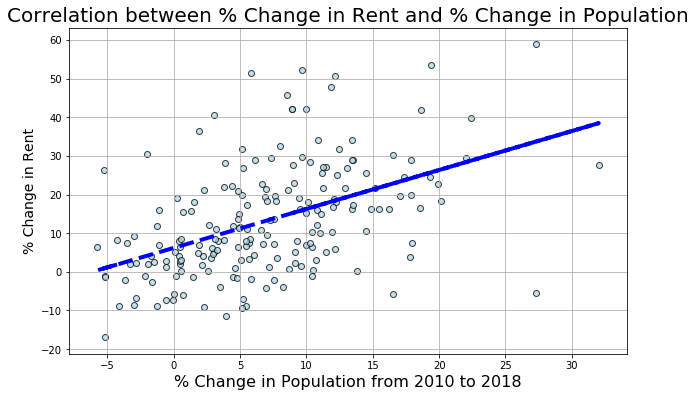

In [42]:
plt.figure(figsize=(10, 6))
fit_plot = plt.plot(pop, rent_fit, "b--", linewidth=4)
chart3 = plt.scatter(merge_rent_pop["% Change in Population"], merge_rent_pop["%Change"], marker="o", facecolors="lightblue", edgecolors="black", alpha = 0.75)
plt.title("Correlation between % Change in Rent and % Change in Population", size = 20)
plt.ylabel("% Change in Rent", size = 14)
plt.xlabel("% Change in Population from 2010 to 2018", size = 16)
plt.grid()

plt.savefig("Correlation_between_rent_and_pop.png")
plt.show()